<a href="https://colab.research.google.com/github/NivratiKothari/MRM-Assignment-10th-Feb/blob/main/Clustering_Amazon_Review_10th_Feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from nrclex import NRCLex

# Download necessary NLTK data
nltk.download('vader_lexicon')  # For VADER sentiment analysis
nltk.download('punkt')  # For sentence tokenization with TextBlob
nltk.download('punkt_tab') # For sentence tokenization with NRCLex
nltk.download('averaged_perceptron_tagger')  # For word tokenization and POS tagging

# Load the dataset
file_path = "/amazon_review.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    polarity = TextBlob(text).sentiment.polarity
    return sentiment_scores['compound'], polarity

# Function to categorize emotions into five types
def categorize_emotion(text):
    emotion = NRCLex(text)
    emotion_scores = emotion.raw_emotion_scores

    # Map emotions into five primary categories
    emotion_mapping = {
        "joy": ["joy", "trust", "anticipation"],
        "sadness": ["sadness"],
        "anger": ["anger", "disgust"],
        "fear": ["fear"],
        "surprise": ["surprise"]
    }

    # Assign highest matching emotion category
    max_emotion = "Neutral"
    max_score = 0
    for category, emotions in emotion_mapping.items():
        score = sum(emotion_scores.get(e, 0) for e in emotions)
        if score > max_score:
            max_emotion = category
            max_score = score

    return max_emotion

# Apply sentiment and emotion analysis
df['Sentiment_Score'], df['Polarity'] = zip(*df['Text'].astype(str).apply(analyze_sentiment))
df['Emotion_Category'] = df['Text'].astype(str).apply(categorize_emotion)

# Save the results to a new CSV file
df.to_csv("sentiment_emotion_analysis_5types.csv", index=False)

# Display the first few rows using pandas head() method
# This replaces the ace_tools function which is not available
print("Sentiment and Emotion Analysis (639 Types)")
display(df.head())  # Displays the first 639 rows by default

ModuleNotFoundError: No module named 'nrclex'

In [2]:
!pip install nrclex # Install the nrclex library

import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from nrclex import NRCLex # Now this import should work

# Download necessary NLTK data
nltk.download('vader_lexicon')  # For VADER sentiment analysis
nltk.download('punkt')  # For sentence tokenization with TextBlob
nltk.download('punkt_tab') # For sentence tokenization with NRCLex
nltk.download('averaged_perceptron_tagger')  # For word tokenization and POS tagging

# Load the dataset
file_path = "/amazon_review.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    polarity = TextBlob(text).sentiment.polarity
    return sentiment_scores['compound'], polarity

# Function to categorize emotions into five types
def categorize_emotion(text):
    emotion = NRCLex(text)
    emotion_scores = emotion.raw_emotion_scores

    # Map emotions into five primary categories
    emotion_mapping = {
        "joy": ["joy", "trust", "anticipation"],
        "sadness": ["sadness"],
        "anger": ["anger", "disgust"],
        "fear": ["fear"],
        "surprise": ["surprise"]
    }

    # Assign highest matching emotion category
    max_emotion = "Neutral"
    max_score = 0
    for category, emotions in emotion_mapping.items():
        score = sum(emotion_scores.get(e, 0) for e in emotions)
        if score > max_score:
            max_emotion = category
            max_score = score

    return max_emotion

# Apply sentiment and emotion analysis
df['Sentiment_Score'], df['Polarity'] = zip(*df['Text'].astype(str).apply(analyze_sentiment))
df['Emotion_Category'] = df['Text'].astype(str).apply(categorize_emotion)

# Save the results to a new CSV file
df.to_csv("sentiment_emotion_analysis_5types.csv", index=False)

# Display the first few rows using pandas head() method
# This replaces the ace_tools function which is not available
print("Sentiment and Emotion Analysis (639 Types)")
display(df.head())  # Displays the first 639 rows by default

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=b0c46f29e7e23335990cb1c6b9e3cb49b0cc1656a41ca90b24f04f2d3b3435a7
  Stored in directory: /root/.cache/pip/wheels/ed/ac/fa/7afddefd14f51c4a963ed291b9052746ed3929473e5a33118d
Successfully built nrclex


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


KeyError: 'Text'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00
Dataset Preview:


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4,Four Stars,1406073600,23-07-2014,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5,MOAR SPACE!!!,1382659200,25-10-2013,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4,nothing to really say....,1356220800,23-12-2012,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5,Great buy at this price!!! *** UPDATE,1384992000,21-11-2013,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5,best deal around,1373673600,13-07-2013,513,0,0


Sentiment Analysis Results:


,reviewText,VADER_Label,VADER_Compound,TextBlob_Polarity,TextBlob_Subjectivity
0,No issues.,Negative,-0.2960,0.000000,0.000
1,"Purchased this for my device, it worked as adv...",Negative,-0.2960,0.200000,0.200
2,it works as expected. I should have sprung for...,Negative,-0.3089,0.129167,0.525
3,This think has worked out great.Had a diff. br...,Positive,0.7081,0.000000,0.550
4,"Bought it with Retail Packaging, arrived legit...",Positive,0.7087,0.386667,0.360


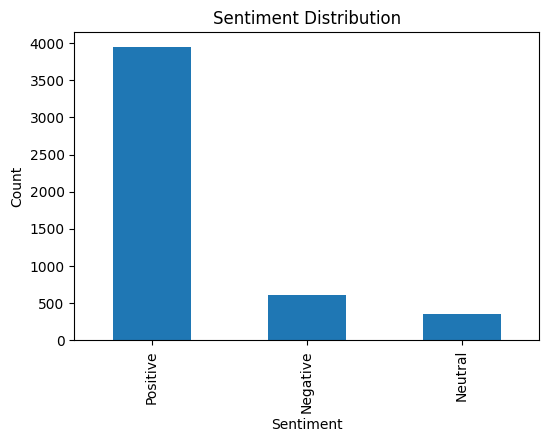

Processed file saved as: amazon_reviews_sentiment.csv


In [3]:
# Install dependencies if running in Colab
!pip install vaderSentiment textblob

# Import necessary libraries
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the dataset
file_path = "/amazon_review.csv"  # Change if needed
df = pd.read_csv(file_path)

# Display the first few rows
print("Dataset Preview:")
display(df.head())

# Ensure the dataset has a review text column
review_column = "reviewText"  # Change this if your column name is different

# Drop missing values in review column
df = df.dropna(subset=[review_column])

# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function for sentiment analysis
def analyze_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    sentiment_label = "Positive" if sentiment_scores["compound"] > 0.05 else "Negative" if sentiment_scores["compound"] < -0.05 else "Neutral"
    textblob_polarity = TextBlob(text).sentiment.polarity
    textblob_subjectivity = TextBlob(text).sentiment.subjectivity
    return pd.Series([sentiment_scores["compound"], sentiment_label, textblob_polarity, textblob_subjectivity])

# Apply sentiment analysis
df[["VADER_Compound", "VADER_Label", "TextBlob_Polarity", "TextBlob_Subjectivity"]] = df[review_column].apply(analyze_sentiment)

# Save the processed data
output_file = "amazon_reviews_sentiment.csv"
df.to_csv(output_file, index=False)

# Display the results
print("Sentiment Analysis Results:")
display(df[[review_column, "VADER_Label", "VADER_Compound", "TextBlob_Polarity", "TextBlob_Subjectivity"]].head())

# Show sentiment distribution
import matplotlib.pyplot as plt

df["VADER_Label"].value_counts().plot(kind="bar", title="Sentiment Distribution", figsize=(6,4))
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

print(f"Processed file saved as: {output_file}")


In [5]:
# prompt: give me word cloud for this data

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Text' is the column with the text data
text = ' '.join(df['Text'].astype(str)) # Combine all text data into a single string

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


KeyError: 'Text'

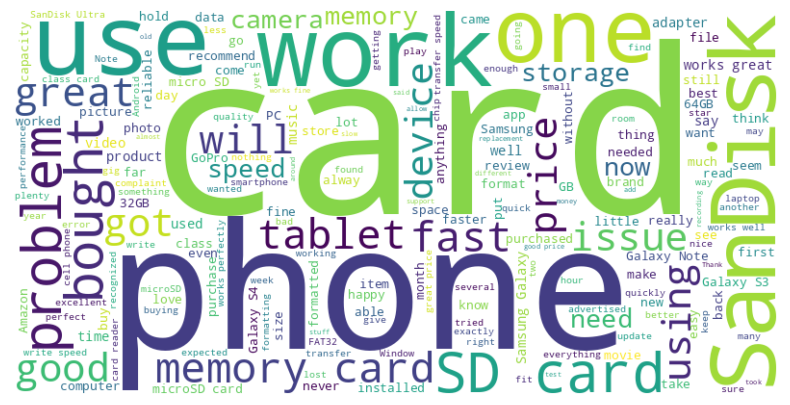

In [6]:
# prompt: give me word cloud for this data

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'reviewText' is the column with the text data
text = ' '.join(df['reviewText'].astype(str)) # Combine all text data into a single string

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Dataset Preview:


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4,Four Stars,1406073600,23-07-2014,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5,MOAR SPACE!!!,1382659200,25-10-2013,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4,nothing to really say....,1356220800,23-12-2012,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5,Great buy at this price!!! *** UPDATE,1384992000,21-11-2013,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5,best deal around,1373673600,13-07-2013,513,0,0


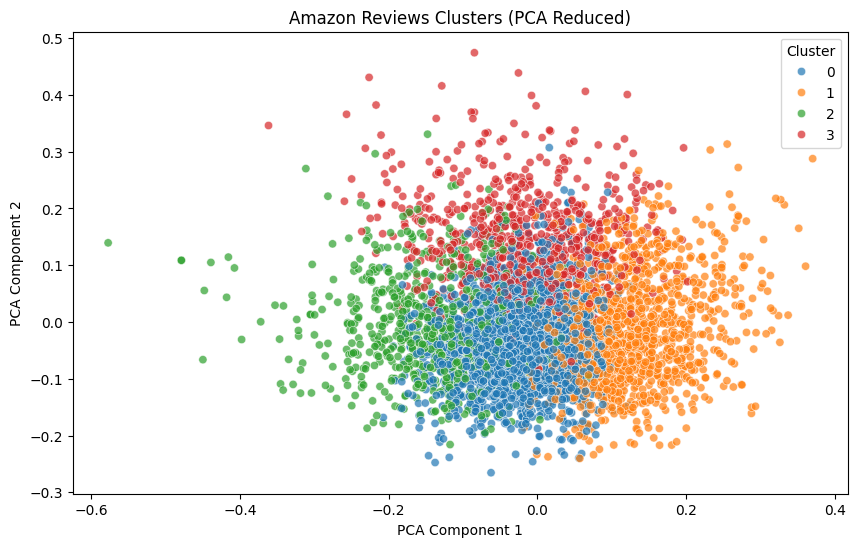

Clustered data saved as: amazon_reviews_clustered.csv


,reviewText,VADER_Label,VADER_Compound,Cluster
0,No issues.,Negative,-0.2960,0
1,"Purchased this for my device, it worked as adv...",Negative,-0.2960,0
2,it works as expected. I should have sprung for...,Negative,-0.3089,0
3,This think has worked out great.Had a diff. br...,Positive,0.7081,1
4,"Bought it with Retail Packaging, arrived legit...",Positive,0.7087,0
5,It's mini storage. It doesn't do anything els...,Neutral,0.0000,0
6,I have it in my phone and it never skips a bea...,Positive,0.8992,0
7,It's hard to believe how affordable digital ha...,Positive,0.6886,1
8,Works in a HTC Rezound. Was running short of ...,Negative,-0.2960,0
9,"in my galaxy s4, super fast card, and am total...",Positive,0.6840,3


In [7]:
# Install necessary libraries if running in Colab
!pip install pandas numpy scikit-learn textblob vaderSentiment matplotlib seaborn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Load dataset
file_path = "/amazon_review.csv"  # Update path if necessary
df = pd.read_csv(file_path)

# Display dataset preview
print("Dataset Preview:")
display(df.head())

# Ensure dataset has a review text column
review_column = "reviewText"  # Change if necessary

# Drop missing values
df = df.dropna(subset=[review_column])

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function for sentiment analysis
def analyze_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    sentiment_label = "Positive" if sentiment_scores["compound"] > 0.05 else "Negative" if sentiment_scores["compound"] < -0.05 else "Neutral"
    textblob_polarity = TextBlob(text).sentiment.polarity
    return pd.Series([sentiment_scores["compound"], sentiment_label, textblob_polarity])

# Apply sentiment analysis
df[["VADER_Compound", "VADER_Label", "TextBlob_Polarity"]] = df[review_column].apply(analyze_sentiment)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X_tfidf = vectorizer.fit_transform(df[review_column])

# Apply K-Means Clustering
num_clusters = 4  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_tfidf)

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Add PCA components to the dataframe
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# Plot Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", alpha=0.7)
plt.title("Amazon Reviews Clusters (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Save the clustered data
output_file = "amazon_reviews_clustered.csv"
df.to_csv(output_file, index=False)

print(f"Clustered data saved as: {output_file}")
display(df[[review_column, "VADER_Label", "VADER_Compound", "Cluster"]].head(10))
